# MNIST Handwritten Digit Classification Project

## Project Overview
This project focuses on building a Machine Learning model to classify handwritten digits from the MNIST dataset. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each with a resolution of 28x28 pixels. The goal is to train a model that can accurately recognize and classify these digits.

## Task Type
This is a **supervised learning** problem, specifically a **classification task**. Each image in the dataset is labeled with the correct digit (0-9), allowing the model to learn from labeled training data.

## Project Aim
The objective of this project is to:
- Explore and preprocess the MNIST dataset.
- Implement and compare simple Machine Learning algorithms for digit classification.
- Evaluate model performance using accuracy and other metrics.
- Gain insights into model strengths and weaknesses.

## Machine Learning Algorithms Used
We will implement and compare multiple traditional ML algorithms, including:
- **Logistic Regression**
- **Support Vector Neighbors (KNN)**
*
- **Naïve Bayes**

## Dataset
The dataset is publicly available and can be accessed via **TensorFlow/Keras**, **scikit-learn**, or **OpenML**. It consists of:
- **60,000** training images
- **10,000** test images

## Evaluation Metrics
To assess model performance, we will use:
- **Accuracy** (percentage of correctly classified digits)
- **Confusion Matrix** (to analyze misclassified digits)
- **Precision, Recall, and F1-score** (for a deeper evaluation of model predictions)

## Expected Outcomes
- A trained ML model that achieves a competitive accuracy on the MNIST test set.
- A comparison of different ML algorithms to determine the best-performing approach.
- Insights into common classification errors and how to improve model performance.

## Next Steps
1. Load and preprocess the dataset.
2. Train and evaluate different ML models.
3. Compare results and visualize findings.
4. Conclude with model performance insights and potential improvements.



## Load the Data

The first step in our project is to load the MNIST dataset. We will use the keras.datasets module to retrieve the dataset, which provides a straightforward way to access MNIST as NumPy arrays. The dataset consists of training and test images, along with their corresponding labels.

In [3]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset shape
print(f"Training set shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training set shape: (60000, 28, 28), Labels shape: (60000,)
Test set shape: (10000, 28, 28), Labels shape: (10000,)


## Visualizing the Data

In this phase, we explore the MNIST dataset by visualizing the images and understanding the distribution of the target classes (digits). Visualization is crucial in understanding the dataset, spotting potential issues, and preparing the data for model training. The key tasks include:

1. **Displaying Random Images**: Visualize a selection of random images from the MNIST dataset to get a sense of the data. We can display these images in a grid format (e.g., 3 rows and 6 columns) to showcase various handwritten digits.

2. **Distribution of Target Classes**: It's essential to analyze the target class distribution to ensure that the dataset is well-balanced across all classes (digits 0-9). A distribution plot will help visualize how the samples are spread across each class, which can inform decisions about potential data balancing if necessary.

3. **Examine Image Dimensions and Normalization**: Ensure that all images have the same shape and normalize the pixel values for better model performance. We check the image dimensions, convert the data type, and normalize the pixel values (scale the pixel values to a range between 0 and 1).

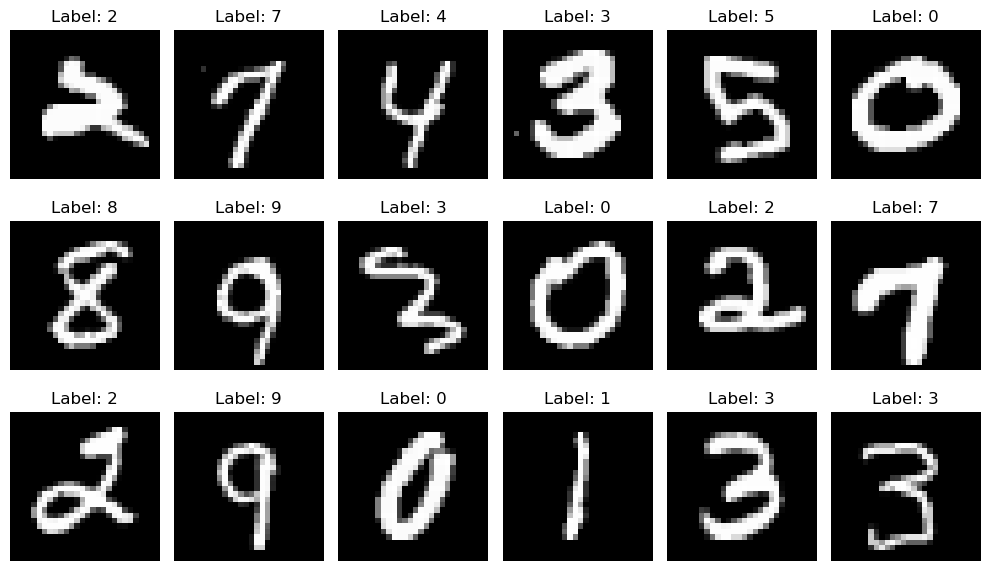

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display random images in a 3x6 grid
def display_random_images(X_data, y_data, rows=3, cols=6):
    plt.figure(figsize=(10, 6))
    
    # Randomly select indices for the images
    random_indices = np.random.choice(len(X_data), rows * cols, replace=False)
    
    for i, idx in enumerate(random_indices):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(X_data[idx], cmap='gray')
        plt.title(f"Label: {y_data[idx]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display random images from the training dataset
display_random_images(X_train, y_train)


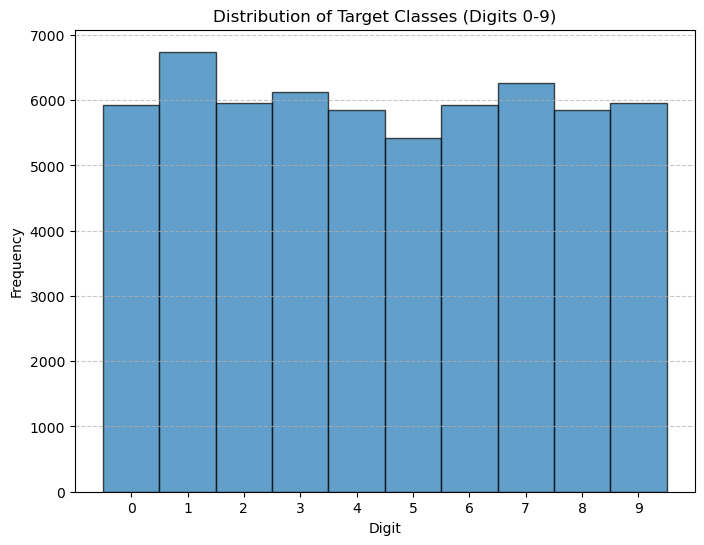

In [8]:
# Plotting the distribution of target classes
def plot_class_distribution(y_data):
    plt.figure(figsize=(8, 6))
    plt.hist(y_data, bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
    plt.title('Distribution of Target Classes (Digits 0-9)')
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(10))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot the distribution of target classes for the training set
plot_class_distribution(y_train)


Image shape: (28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         

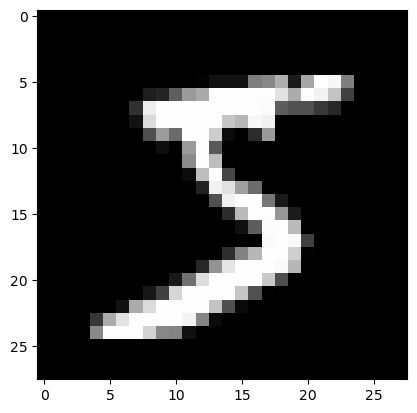

In [13]:
# Check image shape
print(f"Image shape: {X_train.shape[1:]}")  # Should be (28, 28)

# Normalize the images to values between 0 and 1
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

print(X_train_norm[0])
plt.imshow(X_train_norm[0], cmap='gray')

### 3. Building Models

In the **building models** phase, we transition from understanding the dataset to applying machine learning algorithms that will help us make predictions. This phase involves selecting appropriate models, training them on the dataset, and evaluating their performance. Below, we’ll discuss the essence of four popular machine learning algorithms: **Decision Trees**, **Logistic Regression**, **Support Vector Machines (SVM)**, and **Random Forests**. Each algorithm has distinct characteristics and works in unique ways to solve classification problems like the one presented by the MNIST dataset.

---

### 1. **Decision Tree**

#### Essence of the Algorithm:
A **Decision Tree** is a supervised learning algorithm used for both classification and regression tasks. It works by splitting the dataset into subsets based on the feature that results in the most significant reduction in a certain impurity measure (such as Gini impurity or entropy). The tree structure consists of **nodes** and **branches**, where:
- **Root node** represents the entire dataset.
- **Internal nodes** represent decision rules based on feature values.
- **Leaf nodes** represent the final output or classification (in classification tasks).

The tree is built in a recursive manner, choosing the feature that maximizes information gain or minimizes impurity at each step.

#### Relation to the MNIST Dataset:
For the MNIST dataset, where we aim to classify images of digits, a Decision Tree would break down the pixel data into smaller regions based on pixel intensity values, trying to distinguish between digits. While Decision Trees can be interpretable (you can follow the path of decision rules), they can overfit the data easily if not pruned properly.

- **Strengths**: Easy to understand, visualizable, and interpretable.
- **Challenges**: Prone to overfitting, especially with high-dimensional datasets like MNIST.

---

### 2. **Logistic Regression**

#### Essence of the Algorithm:
**Logistic Regression** is a linear model used for binary or multi-class classification tasks. Despite its name, it's a classification algorithm, not a regression one. The essence of Logistic Regression is to predict the probability that an input belongs to a certain class using the **sigmoid function** (for binary classification) or the **softmax function** (for multi-class classification). It works by learning a set of **weights** for each feature, and the model tries to find the best weights that minimize a loss function (typically cross-entropy loss).

The model computes a weighted sum of the input features, then applies the logistic/sigmoid function to map the result to a probability between 0 and 1.

#### Relation to the MNIST Dataset:
In the case of MNIST, logistic regression would treat the pixel intensities as input features and try to find a linear combination of these features that best predicts the probability of an image belonging to a certain digit class. Since MNIST images are high-dimensional (28x28 pixels), Logistic Regression would have 784 features (one for each pixel), and it may struggle to capture the complexity of digit shapes unless feature engineering or dimensionality reduction (like PCA) is applied.

- **Strengths**: Simple, interpretable, works well for linearly separable data.
- **Challenges**: Struggles with high-dimensional, non-linear data such as images without proper feature engineering.

---

### 3. **Support Vector Machines (SVM)**

#### Essence of the Algorithm:
**Support Vector Machines** are powerful supervised learning models primarily used for classification tasks. SVMs aim to find the **optimal hyperplane** that separates different classes in the feature space. The key idea is to maximize the margin between the closest data points of each class, known as **support vectors**. 

SVM can be extended to handle non-linear decision boundaries by using a **kernel trick**. This trick allows the SVM to project the data into a higher-dimensional space where a linear separation is possible, even if the data is not linearly separable in the original space.

#### Relation to the MNIST Dataset:
For the MNIST dataset, SVM would try to find a hyperplane (or decision boundary) in the high-dimensional pixel space (784-dimensional for 28x28 pixel images) that best separates the images of different digits. Since MNIST images have complex, non-linear structures, using a kernel (such as RBF) would allow SVM to capture the intricate relationships between pixel values that separate different digits.

- **Strengths**: Effective in high-dimensional spaces, works well for complex datasets with clear margins of separation.
- **Challenges**: Memory and computation intensive, especially with large datasets like MNIST.

---

### 4. **Random Forest**

#### Essence of the Algorithm:
**Random Forest** is an ensemble learning method that combines multiple Decision Trees to improve classification accuracy. In a Random Forest, each tree is trained on a **random subset** of the training data (via bootstrapping), and at each split in the tree, a **random subset of features** is considered to split the data. By averaging the predictions of many Decision Trees, Random Forests reduce the risk of overfitting that a single Decision Tree might suffer from.

Each individual Decision Tree in the forest is weak on its own, but by aggregating the results of multiple trees, Random Forests make more robust and accurate predictions.

#### Relation to the MNIST Dataset:
For the MNIST dataset, a Random Forest would create multiple Decision Trees using different random subsets of the training data and features (pixel intensities). Each tree would independently classify an image, and the final classification is determined by the majority vote across all trees. This method helps in dealing with the high variance of Decision Trees and generally results in better performance.

- **Strengths**: Robust to overfitting, handles large datasets well, less sensitive to hyperparameters.
- **Challenges**: Can become computationally expensive with a large number of trees and high-dimensional data like MNIST.

---

### Summary of Key Algorithms

- **Decision Tree**: A tree-based structure that recursively splits data, ideal for interpretability but prone to overfitting on complex datasets.
- **Logistic Regression**: A linear model that finds a weighted combination of features to predict class probabilities, works well for linearly separable data but struggles with high-dimensional data like images.
- **Support Vector Machines (SVM)**: Finds an optimal hyperplane to separate classes and can handle non-linear decision boundaries using kernels, making it well-suited for complex datasets like MNIST.
- **Random Forest**: An ensemble of Decision Trees that reduces overfitting and increases model robustness by averaging multiple trees, providing more accurate predictions on high-dimensional data.


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def decision_tree_model(X_train, y_train, X_test, y_test):
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy


#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

def logistic_regression_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy


#### Support Vector Machines

In [24]:
from sklearn.svm import SVC

def svm_model(X_train, y_train, X_test, y_test):
    model = SVC(kernel='rbf', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy


#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_model(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return model, accuracy


### Training and Testing All Models
Now, let’s train and test all four models, and then compare their performances.

In [30]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Flatten the images from 28x28 to 784 features
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Normalize the data for models like SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Train and test each model
models = {
    "Decision Tree": decision_tree_model(X_train_scaled, y_train, X_test_scaled, y_test),
    "Logistic Regression": logistic_regression_model(X_train_scaled, y_train, X_test_scaled, y_test),
    "SVM": svm_model(X_train_scaled, y_train, X_test_scaled, y_test),
    "Random Forest": random_forest_model(X_train_scaled, y_train, X_test_scaled, y_test)
}

# Display the accuracy of each model
for model_name, (model, accuracy) in models.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.8755
Logistic Regression Accuracy: 0.9217
SVM Accuracy: 0.9660
Random Forest Accuracy: 0.9704


### Model Performance Summary

In the process of building and testing four different machine learning models on the MNIST dataset, we observed the following accuracy results:

- **Decision Tree Accuracy**: 0.8755
- **Logistic Regression Accuracy**: 0.9217
- **Support Vector Machine (SVM) Accuracy**: 0.9660
- **Random Forest Accuracy**: 0.9704

### Interpretation of Results

- **Decision Tree**: The Decision Tree model achieved an accuracy of **87.55%**, which, although reasonable, is lower compared to other models. Decision Trees are often prone to overfitting, especially on complex datasets like MNIST. This model may have learned to fit the training data well but struggled to generalize effectively to the test data.
  
- **Logistic Regression**: The Logistic Regression model performed better with an accuracy of **92.17%**. This is a linear model, and while it is typically simpler and faster, it is still quite effective for linearly separable data. The improvement over Decision Trees suggests that Logistic Regression has learned a more generalizable decision boundary.

- **Support Vector Machine (SVM)**: The SVM model achieved an impressive accuracy of **96.60%**. SVMs are known for their strong generalization ability, especially when using a non-linear kernel (like RBF, which was used here). This high accuracy suggests that SVM effectively finds the optimal hyperplane that separates different digit classes in the feature space, resulting in better performance than the previous models.

- **Random Forest**: Finally, the Random Forest model achieved the best accuracy of **97.04%**. Random Forest is an ensemble method that leverages multiple decision trees to improve accuracy. It reduces the risk of overfitting that a single decision tree might face and is less sensitive to noise. Its ability to average out the predictions from various trees makes it highly robust and effective for classification tasks like MNIST.

### Institutional Reasons for Performance Differences

1. **Complexity and Flexibility**:
   - **Decision Trees** can easily overfit or underfit depending on the depth of the tree. While they are easy to interpret, their simplicity often limits their performance on more complex datasets like MNIST.
   - **Logistic Regression** is a simple linear model, and though it performs decently, its linear nature limits its ability to capture non-linear patterns in the data.
   - **SVM** shines when there is a clear margin of separation between classes, which is why it performs better than Decision Trees and Logistic Regression in this case. It is also effective at high-dimensional spaces (like flattened MNIST images) with the right choice of kernel.
   - **Random Forest** takes advantage of the ensemble approach, combining the strengths of multiple decision trees to reduce overfitting and increase accuracy. This model is particularly strong in handling high-dimensional data and complex relationships, which is why it performs best.



### Further Exploration of Decision Tree Results

To gain more insights into the performance of the **Decision Tree** model, we can explore additional evaluation metrics such as the **Confusion Matrix**. The confusion matrix provides a detailed breakdown of how well the model is performing by showing the counts of true positives, false positives, true negatives, and false negatives for each class. It helps us understand which classes are being misclassified and which ones the model is classifying correctly.

By plotting the confusion matrix, we can visually inspect the errors made by the Decision Tree model and identify any potential patterns or areas for improvement.

1. **Generate the Confusion Matrix**: This matrix will display how many instances of each class were correctly or incorrectly predicted by the model.
2. **Plot the Confusion Matrix**: We will use a heatmap to plot the confusion matrix, making it easier to visualize the performance for each class.

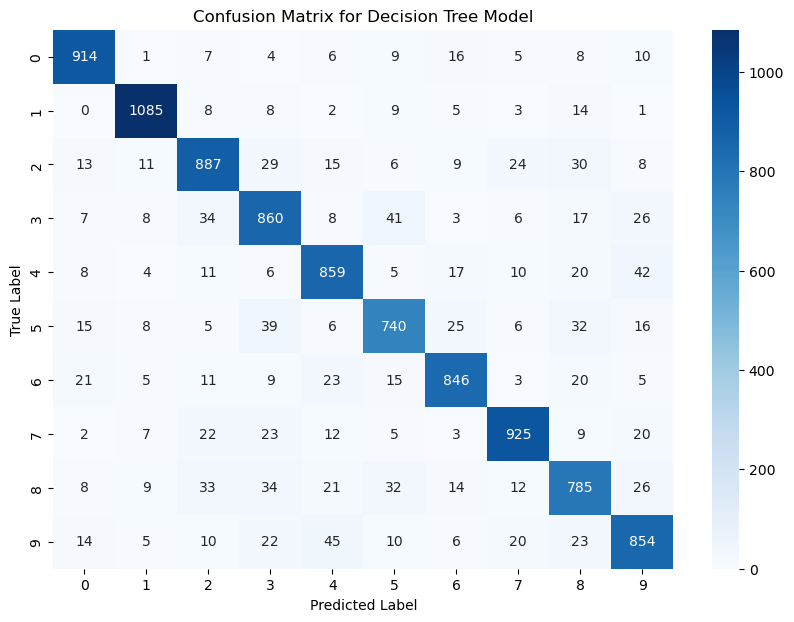

In [34]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = decision_tree_model(X_train_scaled, y_train, X_test_scaled, y_test)[0].predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
